In [304]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

In [305]:
train_imgs: npt.NDArray[np.int8] = np.array([[
    [1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
], [
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1],
], [
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
]])

test_imgs: npt.NDArray[np.int8] = np.array([[
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
], [
    [1, 1, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [1, 1, 0, 0, 1],
], [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
], [
    [0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
]],dtype=np.int8)


In [306]:
class HopfieldNN:
    def __init__(self, height: int, width: int) -> None:
        self.height: int = height
        self.width: int = width
        self.n: int = height * width

        # 1. Najpierw należy zainicjować sieć neuronową, w tym celu należy stworzyć tablicę z wagami
        # sieci o rozmiarze n x n (n to liczba neuronów; n = szerokość * wysokość obrazka)
        # wypełnioną początkowo zerami, niech n=5*5
        self.weights = np.zeros((self.n, self.n), dtype=np.float16)

    # 2. Należy kilkukrotnie narysować różne obrazki 5x5, a następnie nauczyć sieć każdym z tych
    # obrazów. W tym celu trzeba zastosować wzór korekcji wag neuronów napisany uprzednio.
    # Należy zwrócić uwagę, że wartości podanych wejść muszą mieć wartość -1 albo +1 i należy
    # pominąć uczenie wag połączonych samych ze sobą, czyli wagai ,i .
    def train_image(self, img: npt.NDArray[np.int8]) -> None:
        # Uczenie (korekcja) wag neuronów za pomocą reguły Hebba polega na zastosowaniu wzoru:
        # wagai i,j = waga i,j + 1/n *wyjscie_i*wyjscie_j
        img = img.flatten()
        img = np.where(img == 0, -1, 1)
        for i in range(self.n):
            for j in range(self.n):
                if i == j:
                    continue
                self.weights[i][j] = self.weights[i][j] + (1/self.n) * img[i] * img[j]
        pass

    # 3. Należy kilkukrotnie narysować obrazki lekko różniące się od poprzednio nauczonych, a
    # następnie uruchomić funkcję rozpoznania/korekcji. Może się zdarzyć, iż za pierwszym
    # razem sieć nie naprawi całego obrazka, wtedy należy powtórzyć proces rozpoznawania. Za
    # każdym razem sieć Hopfielda powinna finalnie naprawić obraz, czyli podać jego wersję w
    # postaci tej samej co podczas uczenia, albo też jego negatyw.
    def recognize_image(self, img: npt.NDArray[np.int8]) -> npt.NDArray[np.int8]:
        img = img.flatten()
        img = np.where(img == 0, -1, 1)

        # 1. Sumowane są wejścia pomnożone przez odpowiednie wagi
        # sumai= ∑ j=1..n;i≠ j wyjscie_j∗waga i,j , gdzie i to numer aktualnego neuronu, j to numer pozostałych neuronów, waga i,j to waga i-tego neuronu, j-tego wejścia, n to liczba neuronów.
        neurons_sum = []
        for neuron_id in range(self.n):
            sum = 0
            for input_weight_id in range(self.n):
                if input_weight_id == neuron_id:
                    continue
                sum += img[input_weight_id] * self.weights[neuron_id][input_weight_id]
            neurons_sum.append(sum)
        # 2. Liczona jest wartość wyjścia tego neuronu za pomocą progu 0,
        # wyjscie_i = {+1 jeśli suma_i ≥ 0
        #             {−1 jeśli suma_i < 0
        output_img = np.ones((self.height, self.width), dtype=np.int8)
        for i in range(len(neurons_sum)):
            col = (i % self.width)
            row = i//self.width

            if neurons_sum[i] >= 0:
                output_img[row][col] = 1
            else:
                output_img[row][col] = -1
        return output_img

In [307]:
def save_imgs(imgs: dict[str, npt.NDArray[np.int8]], file_name: str) -> None:
    fig, axes = plt.subplots(1, len(imgs), figsize=(15, 6))

    if len(imgs) == 1:
        axes = [axes]

    for img_idx, (img_name, img) in enumerate(imgs.items()):
        axes[img_idx].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[img_idx].set_title(img_name)

    plt.tight_layout()
    plt.savefig(file_name)

## Obrazy Wzorcowe

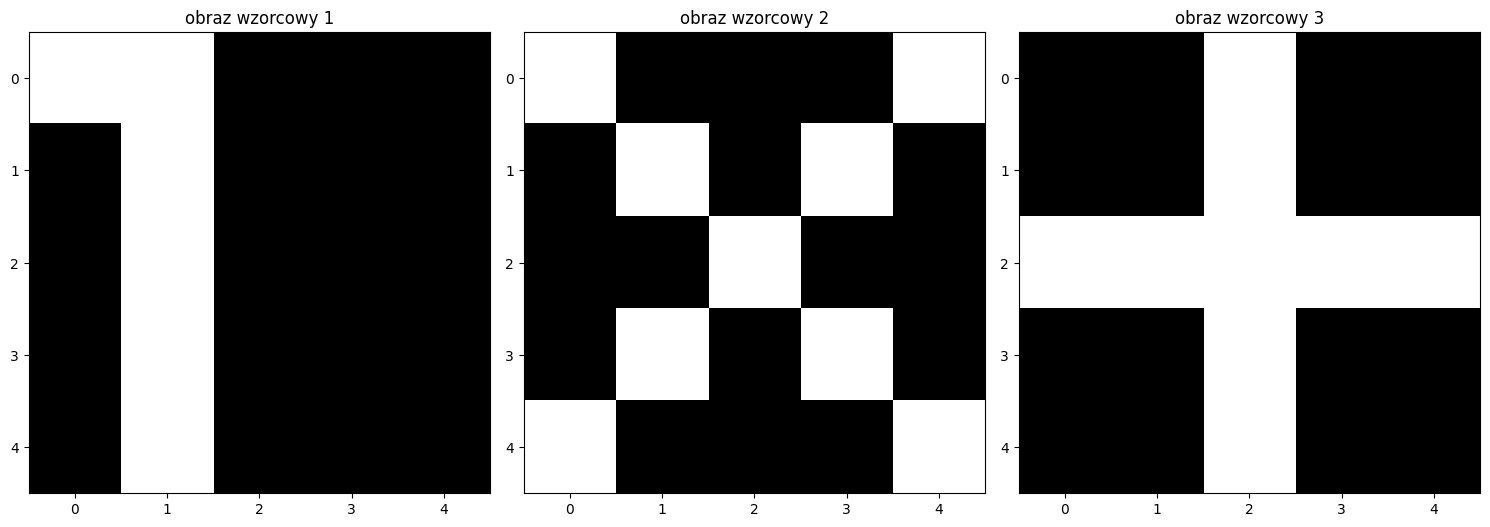

In [308]:
imgs = {
    "obraz wzorcowy 1": train_imgs[0],
    "obraz wzorcowy 2": train_imgs[1],
    "obraz wzorcowy 3": train_imgs[2],
}
save_imgs(imgs, "obrazy_wzorcowe.png")

## Obrazy testowe

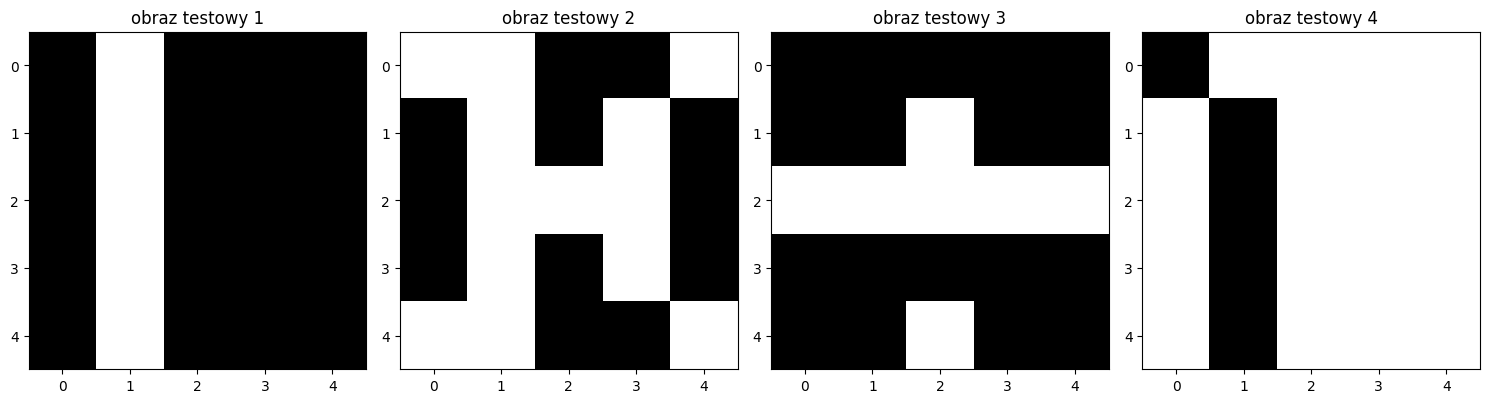

In [309]:
imgs = {
    "obraz testowy 1": test_imgs[0],
    "obraz testowy 2": test_imgs[1],
    "obraz testowy 3": test_imgs[2],
    "obraz testowy 4": test_imgs[3],
}
save_imgs(imgs, "obrazy_testowe.png")

# Raport

## 1. Raport
### Proszę stworzyć sieć przystosowaną do obsługi wcześniejszych obrazów, wagi proszę wypełnić zerami. Następnie proszę nauczyć tą sieć raz wszystkimi znakami wzorcowymi. Następnie proszę podać wszystkie obrazy testowe, każdy z nich dopasować/naprawić i podać wynik działania (wpostaci obrazka). Raport powinien zawierać 4 obrazy.

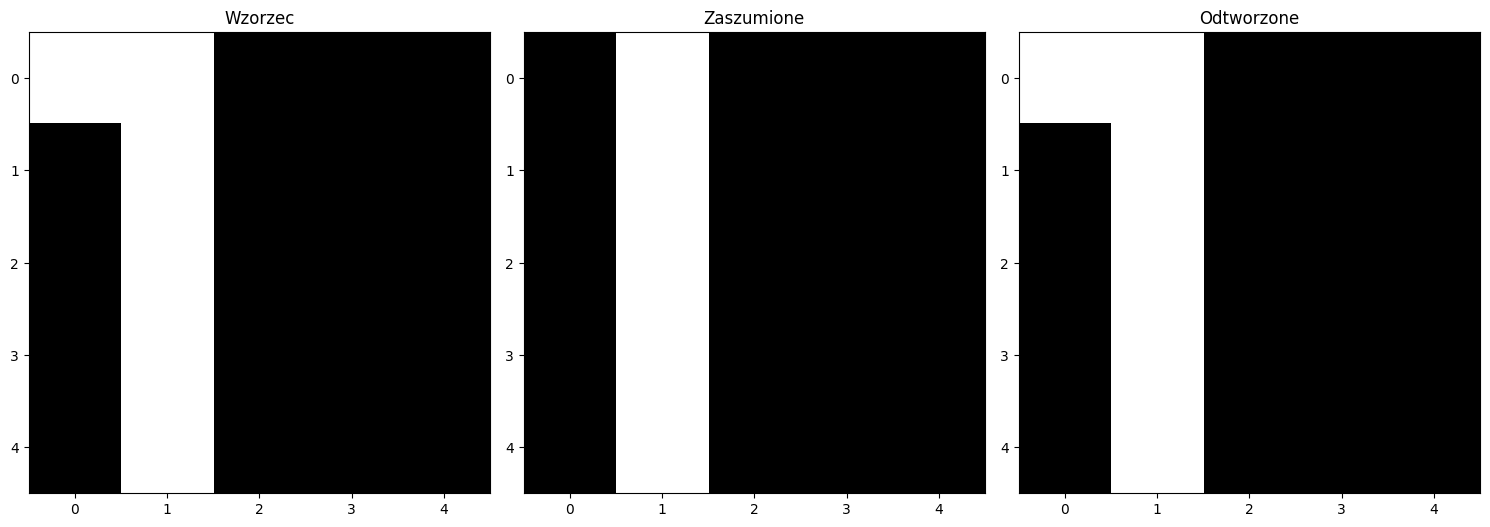

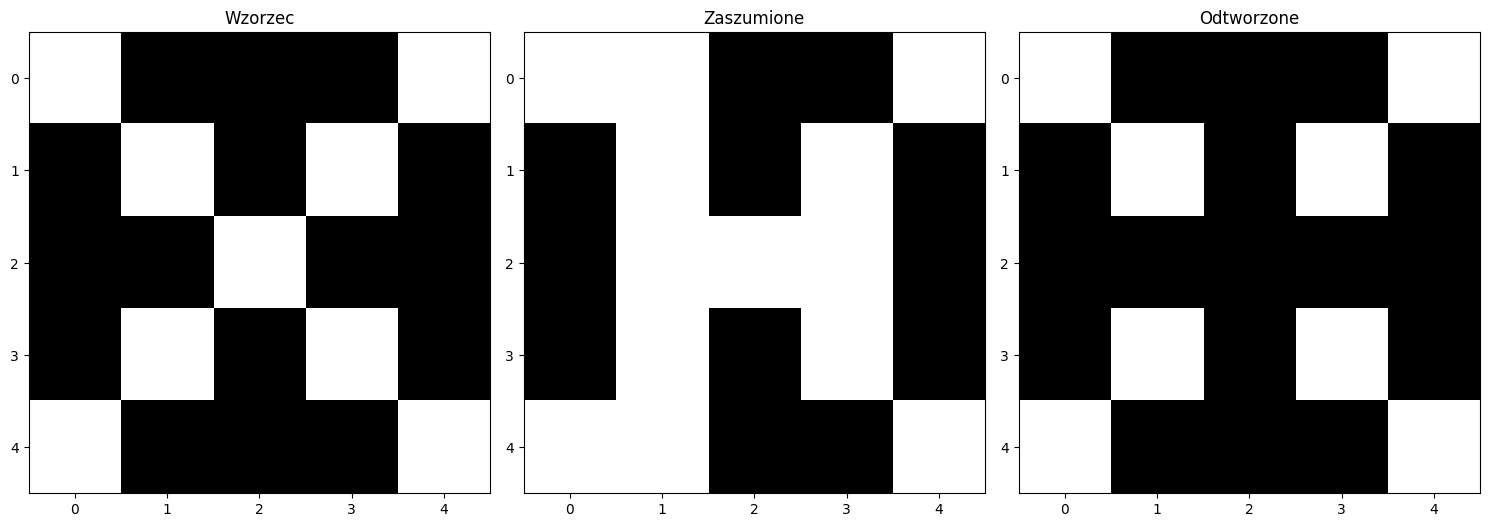

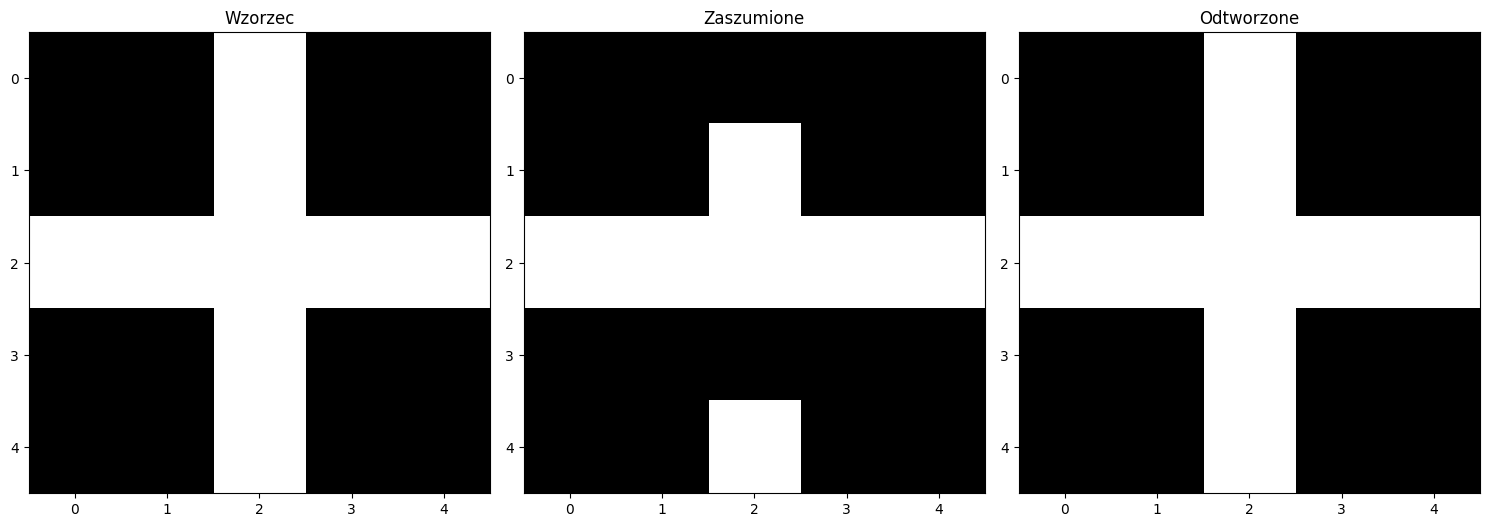

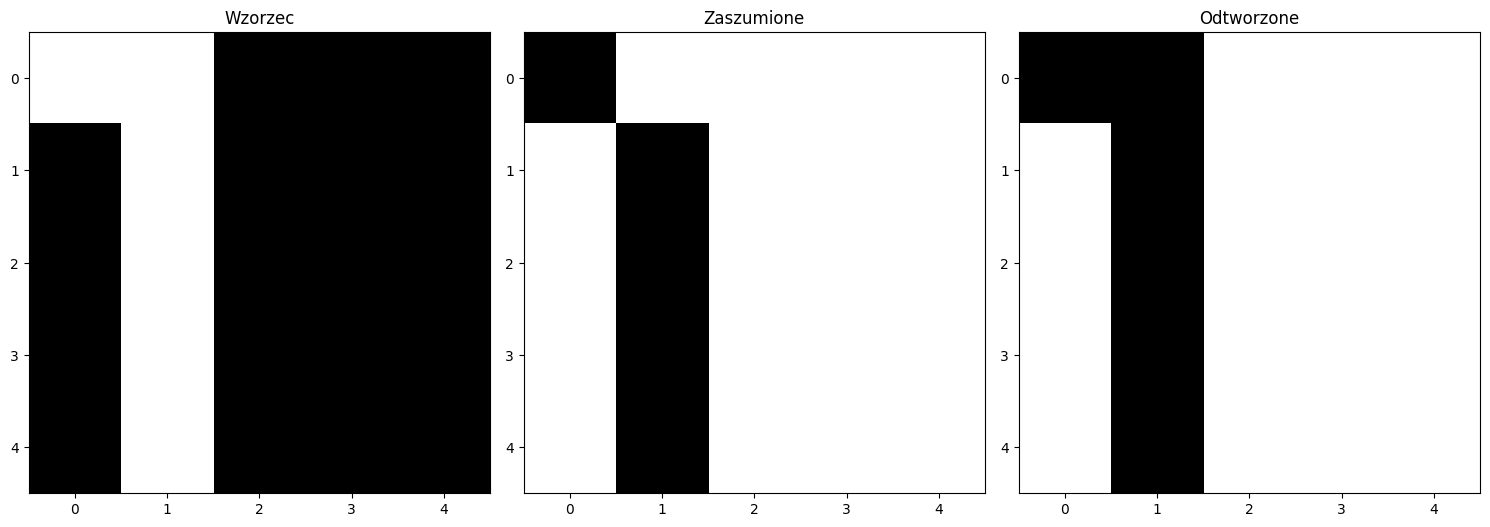

In [310]:
hopfield_nn = HopfieldNN(5, 5)
for img in train_imgs:
    hopfield_nn.train_image(img)

output_test_imgs = np.zeros((len(test_imgs), 5, 5), dtype=np.int8)
for i, test_img in enumerate(test_imgs):
    output_test_imgs[i] = hopfield_nn.recognize_image(test_img)


reports_imgs = [
    {
        "Wzorzec": train_imgs[0],
        "Zaszumione": test_imgs[0],
        "Odtworzone": output_test_imgs[0],
    },
    {
        "Wzorzec": train_imgs[1],
        "Zaszumione": test_imgs[1],
        "Odtworzone": output_test_imgs[1],
    },
    {
        "Wzorzec": train_imgs[2],
        "Zaszumione": test_imgs[2],
        "Odtworzone": output_test_imgs[2],
    },
    {
        "Wzorzec": train_imgs[0],
        "Zaszumione": test_imgs[3],
        "Odtworzone": output_test_imgs[3],
    },
]
for i, report_imgs in enumerate(reports_imgs):
    save_imgs(report_imgs, f"raport1_{i}.png")

## 2. Raport
### Należy nauczyć sieć tak jak poprzednio, następnie wyświetlić wszystkie wagi (waga1,j ; j=1..25) pierwszego neuronu (odpowiedzialny za lewy-górny piksel). Proszę wyświetlić te wagi w formie tabelki 5x5. Na przykład
-0.00 +0.23 +4.32 -4.53 -0.43<br>
-0.10 -0.23 +4.32 -4.53 -0.43<br>
-0.20 +0.23 +4.32 -4.53 -0.43<br>
-0.30 -0.23 +4.32 -4.53 -0.43<br>
-0.40 +0.23 +4.32 -4.53 -0.43<br>

In [311]:
neuron_weights = hopfield_nn.weights[0]
for i in range(5):
    for j in range(5):
        print(f"{neuron_weights[i+j]:+.2f}", end=" ")
    print()

+0.00 +0.04 -0.12 -0.04 +0.04 
+0.04 -0.12 -0.04 +0.04 -0.04 
-0.12 -0.04 +0.04 -0.04 +0.12 
-0.04 +0.04 -0.04 +0.12 -0.12 
+0.04 -0.04 +0.12 -0.12 +0.04 


## 3. Raport
### Należy nauczyć sieć tak jak poprzednio, następnie podać obraz będący negatywem znaku testowego 1., następnie go dopasować/naprawić.

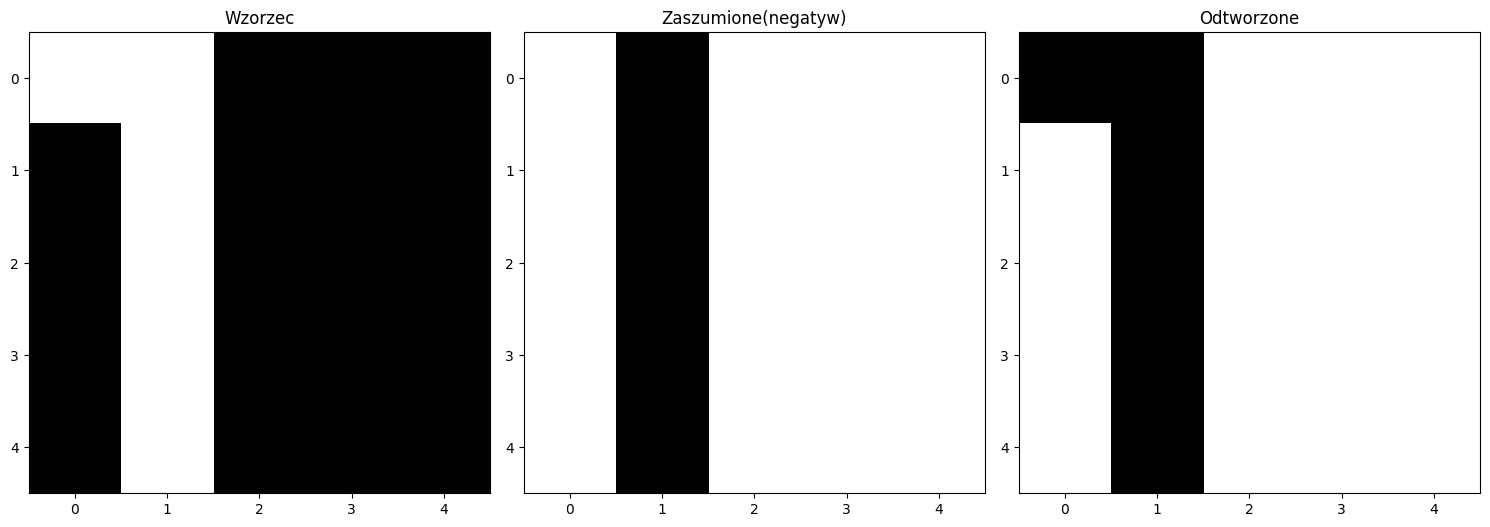

In [312]:
negative_test_img = np.where(np.array(test_imgs[0]) == 0, 1, 0)
negative_output_img = hopfield_nn.recognize_image(negative_test_img)
imgs = {
    "Wzorzec": train_imgs[0],
    "Zaszumione(negatyw)": negative_test_img,
    "Odtworzone": negative_output_img,
}
save_imgs(imgs, f"raport3.png")

## 4. Raport
### Należy nauczyć sieć tak jak poprzednio, następnie podać obraz mocno różniący się od obrazów wzorcowych i go wyświetlić w formie tabelki 5x5. Później proszę dopasować/naprawić wszystkie piksele i wyświetlić obraz po zmianie. Czynność należy powtórzyć 2-krotnie. W tym raporcie powinny pojawić się 1+2 obrazko-tabele 5x5.

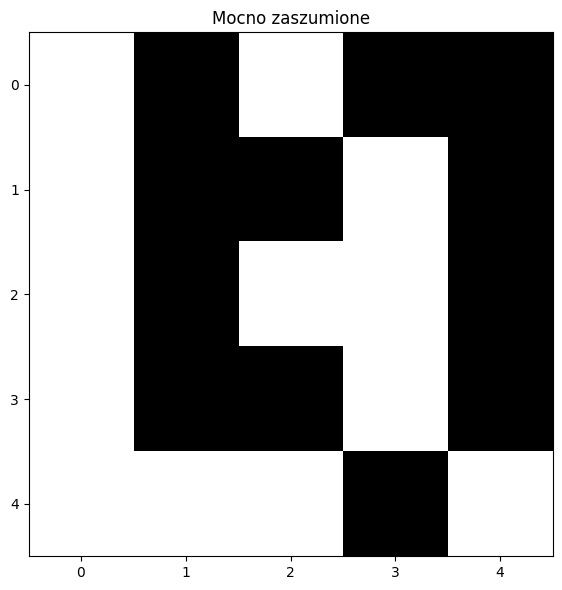

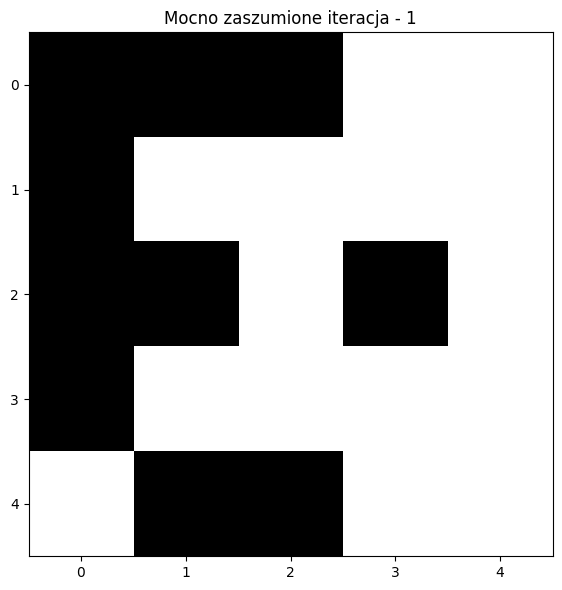

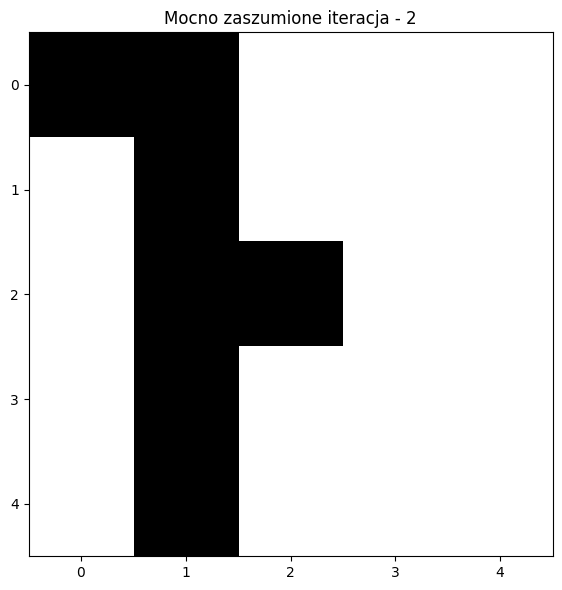

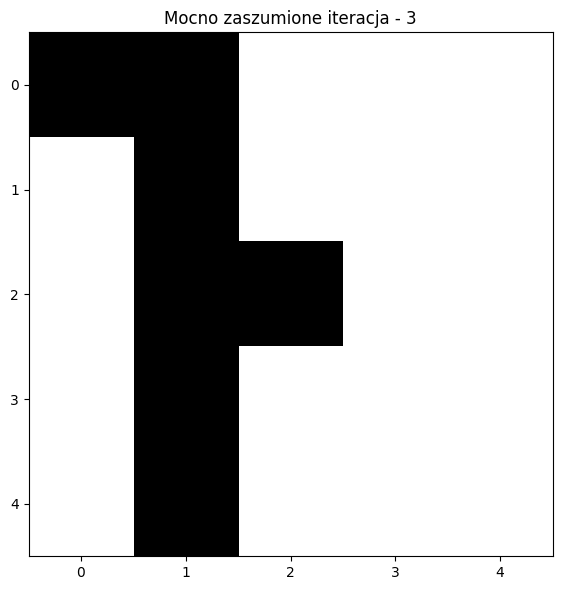

In [313]:
noisy_img: npt.NDArray[np.int8] = np.array([
    [1, 0, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0],
    [1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1],
])
save_imgs({"Mocno zaszumione": noisy_img}, f"raport4_0.png")
for i in range(3):
    noisy_img = hopfield_nn.recognize_image(noisy_img)
    save_imgs({f"Mocno zaszumione iteracja - {i+1}": noisy_img}, f"raport4_{i+1}.png")